##### For Text Mining assignment

1) Perform sentimental analysis on the Elon-musk tweets (Exlon-musk.csv)

##### Import Libraries

In [1]:
import numpy as np
import pandas as pd

##### Data collection 

In [2]:
elon = pd.read_csv('Elon_musk.csv', encoding='latin1')
elon

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [3]:
elon.isna().sum()

Unnamed: 0    0
Text          0
dtype: int64

In [4]:
elon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1999 non-null   int64 
 1   Text        1999 non-null   object
dtypes: int64(1), object(1)
memory usage: 31.4+ KB


In [5]:
#Load Stop words

stop = pd.read_csv('stop.txt',encoding = 'latin-1')
stop

,a
0,a's
1,able
2,about
3,above
4,according
...,...
565,yours
566,yourself
567,yourselves
568,z


In [6]:
#Remove the Unnamed: 0 column because it is unnecessary

elon = elon.drop('Unnamed: 0', axis=1)
elon

,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
...,...
1994,"@flcnhvy True, it sounds so surreal, but the n..."
1995,@PPathole Make sure to read ur terms &amp; con...
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [7]:
elon.describe()

,Text
count,1999
unique,1997
top,The most entertaining outcome is the most likely
freq,2


In [8]:
tweets = elon.copy()

In [9]:
# Remove all types of punctuations, numbers, special characters and lowerletters

import re
import string

def clean_text(text):
    text = re.sub(r'@[A-Z_a-z_0-9_]+', '', text)
    text = re.sub(r'https?:\/\/\S+', '', text)
    text = re.sub(r'#', '', text)     
    text = text.lower()
    return text

tweets['Text'] = elon['Text'].apply(clean_text)
tweets

,Text
0,im an alien
1,ray tracing on cyberpunk with hdr is next-lev...
2,great interview!
3,doge is underestimated
4,congratulations tesla china for amazing execu...
...,...
1994,"true, it sounds so surreal, but the negative ..."
1995,make sure to read ur terms &amp; conditions b...
1996,samwise gamgee
1997,altho dumb and dumber is <u+0001f525><u+0001f...


In [10]:
def thorough_clean(text):
    text = re.sub('[^A-Za-z0-9]', ' ',text)
    return(text)
tweets['Text'] = tweets['Text'].apply(thorough_clean)
tweets

,Text
0,i m an alien
1,ray tracing on cyberpunk with hdr is next lev...
2,great interview
3,doge is underestimated
4,congratulations tesla china for amazing execu...
...,...
1994,true it sounds so surreal but the negative ...
1995,make sure to read ur terms amp conditions b...
1996,samwise gamgee
1997,altho dumb and dumber is u 0001f525 u 0001f...


In [11]:
#Word frequency of tweets

Freq_tweets = pd.Series(' '.join(tweets['Text']).split()).value_counts()[:20]
Freq_tweets

the     487
to      400
a       357
is      356
u       319
of      315
in      221
amp     219
it      194
for     194
s       173
we      172
will    165
be      157
that    149
this    140
i       137
on      129
rt      127
but     126
dtype: int64

In [12]:
#clean stop words data

stop = [x.strip() for x in stop] # remove both the leading and the trailing characters
stop = [x for x in stop if x] # removes empty strings, because they are considered in Python as False
stop[0:10]

['a']

In [13]:
import nltk

nltk.download('stopwords')

[nltk_data] Error loading stopwords: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


False

In [14]:
from nltk.corpus import stopwords

In [15]:
Final_tweets = tweets.copy()

In [16]:
Final_tweets['Text'] = tweets['Text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
Final_tweets

,Text
0,i m an alien
1,ray tracing on cyberpunk with hdr is next leve...
2,great interview
3,doge is underestimated
4,congratulations tesla china for amazing execut...
...,...
1994,true it sounds so surreal but the negative pro...
1995,make sure to read ur terms amp conditions befo...
1996,samwise gamgee
1997,altho dumb and dumber is u 0001f525 u 0001f525


In [17]:
# Word frequency after removal of stopwords

freq_cleaned = pd.Series(' '.join(tweets['Text']).split()).value_counts()[:20]
freq_cleaned

the     487
to      400
a       357
is      356
u       319
of      315
in      221
amp     219
it      194
for     194
s       173
we      172
will    165
be      157
that    149
this    140
i       137
on      129
rt      127
but     126
dtype: int64

In [18]:
# Count vectorizer also tell us the frequency and occurences of word

from sklearn.feature_extraction.text import CountVectorizer 

vectorizer = CountVectorizer(min_df = 1, max_df = 0.9)
X = vectorizer.fit_transform(tweets['Text'])
word_freq_df = pd.DataFrame({'term': vectorizer.get_feature_names(), 'occurrences':np.asarray(X.sum(axis=0)).ravel().tolist()})
word_freq_df['frequency'] = word_freq_df['occurrences']/np.sum(word_freq_df['occurrences'])

C:\Users\imjma\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [19]:
print(word_freq_df.sort_values('occurrences',ascending = False).head())

     term  occurrences  frequency
3526  the          487   0.029033
3578   to          400   0.023846
1931   is          356   0.021223
2454   of          315   0.018779
1827   in          221   0.013175


In [20]:
# TFIDF - Term frequency inverse Document Frequency

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english', max_features= 1000, max_df = 0.5, smooth_idf=True)
doc_vec = vectorizer.fit_transform(tweets["Text"])

names_features = vectorizer.get_feature_names()
dense = doc_vec.todense()
denselist = dense.tolist()

df = pd.DataFrame(denselist, columns = names_features)

C:\Users\imjma\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [21]:
df

,000,0001f1e9,0001f1ea,0001f339,0001f3b6,0001f440,0001f44c,0001f44d,0001f495,0001f4ab,...,wrong,ya,yeah,year,years,yes,yesterday,yup,zero,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.402126,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
# Bi-gram

def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  #for tri-gram, put ngram_range=(3,3)
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [23]:
Top2_words = get_top_n2_words(tweets["Text"], n=200)
Top2_df = pd.DataFrame(Top2_words)
Top2_df.columns=["Bi-gram", "Freq"]
Top2_df.head()

,Bi-gram,Freq
0,will be,51
1,of the,47
2,this is,36
3,in the,36
4,0001f923 0001f923,35


Text(0.5, 1.05, 'Most two words used together in tweets by elon')

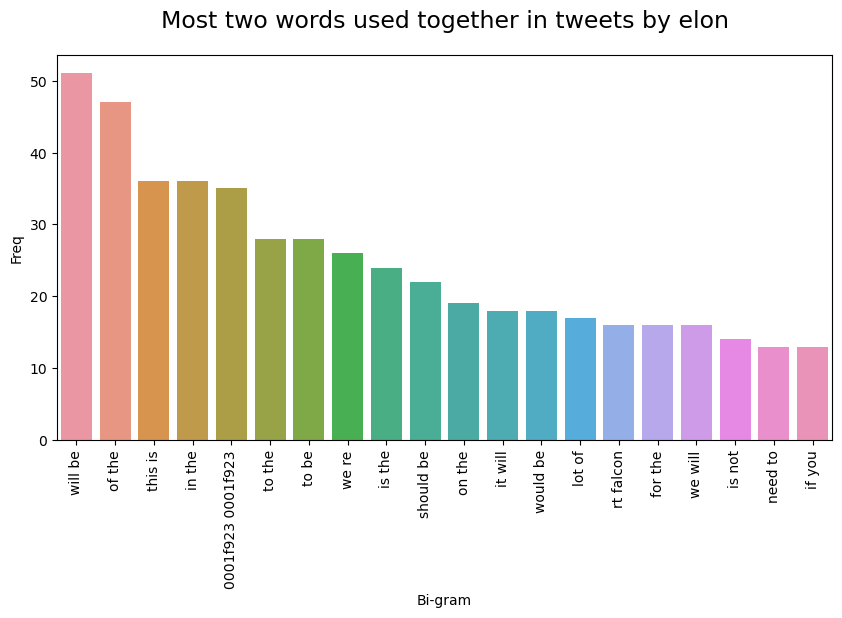

In [24]:
# Bi-gram plot

import matplotlib.pyplot as plt
import seaborn as sns

Top20_bigram = Top2_df.iloc[0:20,:]
fig = plt.figure(figsize = (10, 5))
plot=sns.barplot(x=Top20_bigram["Bi-gram"],y=Top20_bigram["Freq"])
plot.set_xticklabels(rotation=90,labels = Top20_bigram["Bi-gram"])
plt.title("Most two words used together in tweets by elon", y=1.05, fontsize=17)

In [25]:
#Tri-gram

def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [26]:
Top3_words = get_top_n3_words(tweets["Text"], n=200)
Top3_df = pd.DataFrame(Top3_words)
Top3_df.columns=["Tri-gram", "Freq"]
Top3_df.head()

,Tri-gram,Freq
0,falcon first stage,9
1,it will be,8
2,rt falcon first,8
3,of course still,7
4,course still love,7


Text(0.5, 1.05, 'Most three words used together in tweets by elon')

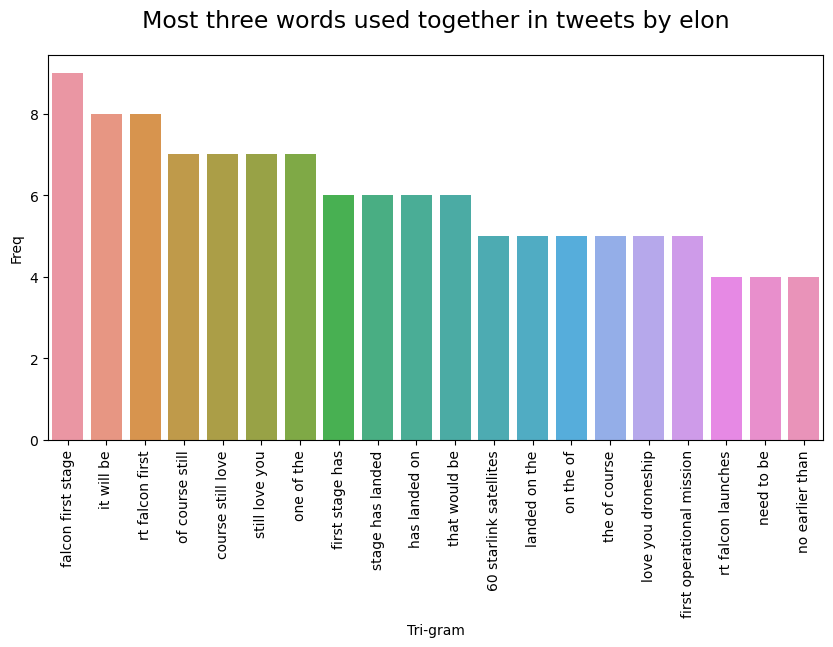

In [27]:
top20_trigram = Top3_df.iloc[0:20,:]
fig = plt.figure(figsize = (10, 5))
plot=sns.barplot(x=top20_trigram["Tri-gram"],y=top20_trigram["Freq"])
plot.set_xticklabels(rotation=90,labels = top20_trigram["Tri-gram"])
plt.title("Most three words used together in tweets by elon", y=1.05, fontsize=17)

In [28]:
from collections import Counter

top_N = 100
stopwords = nltk.corpus.stopwords.words('english')
stopwords = stopwords + ['rt']
RE_stopwords = r'\b(?:{})\b'.format('|'.join(stopwords))
words = (tweets.Text.str.lower().replace([r'\|', RE_stopwords], [' ', ''], regex=True).str.cat(sep=' ').split())

words_data = pd.DataFrame(Counter(words).most_common(300),
                    columns=['Word', 'Frequency']).set_index('Word')

words_data

,Frequency
Word,
u,319
amp,219
tesla,97
yes,86
0001f923,77
...,...
turns,7
safe,7
slightly,7


In [29]:
# Wordcloud for entire corpus

from wordcloud import WordCloud

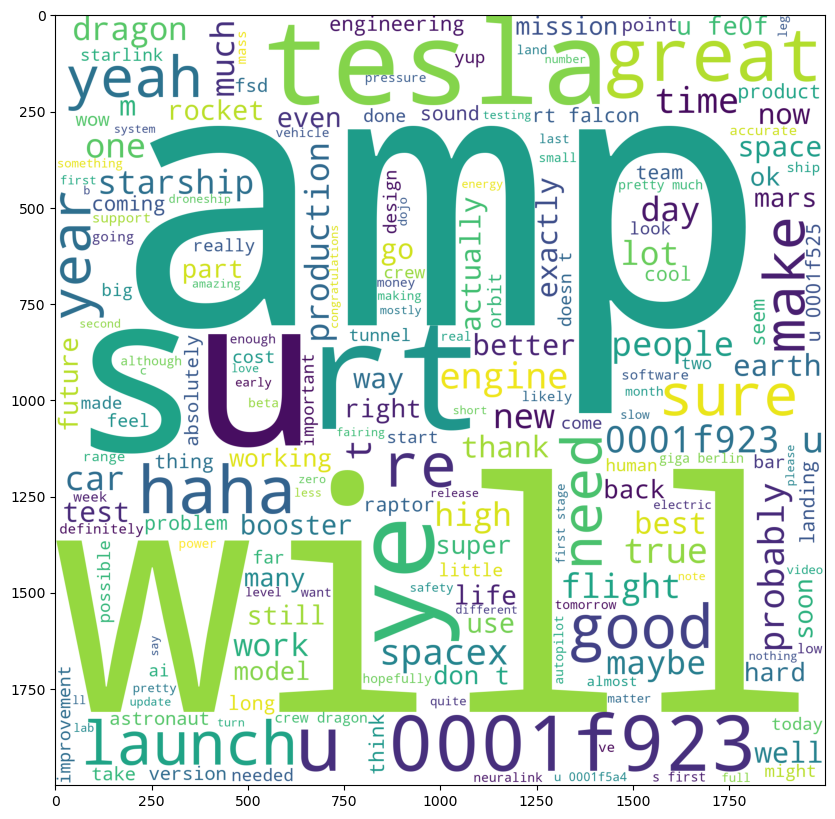

In [30]:
Review_wordcloud = ' '.join(tweets["Text"])
Q_wordcloud=WordCloud(background_color='white', width=2000, height=2000).generate(Review_wordcloud)
fig = plt.figure(figsize = (10, 10))
plt.axis('on')
plt.imshow(Q_wordcloud)

In [31]:
!pip install spacy

In [32]:
!python -m spacy download en_core_web_sm

Traceback (most recent call last):
  File "C:\Users\imjma\anaconda3\lib\site-packages\urllib3\connection.py", line 174, in _new_conn
    conn = connection.create_connection(
  File "C:\Users\imjma\anaconda3\lib\site-packages\urllib3\util\connection.py", line 95, in create_connection
    raise err
  File "C:\Users\imjma\anaconda3\lib\site-packages\urllib3\util\connection.py", line 85, in create_connection
    sock.connect(sa)
TimeoutError: [WinError 10060] A connection attempt failed because the connected party did not properly respond after a period of time, or established connection failed because connected host has failed to respond

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\imjma\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 703, in urlopen
    httplib_response = self._make_request(
  File "C:\Users\imjma\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 386, in _make_request
   

In [33]:
#Named Entity Recognition

import string #special operations on strings
import spacy #language models

In [34]:
nlp = spacy.load('en_core_web_sm')

one_block = tweets.Text.iloc[20]
doc_block = nlp(one_block)
spacy.displacy.render(doc_block, style='ent', jupyter = True)

C:\Users\imjma\anaconda3\lib\site-packages\spacy\displacy\__init__.py:206: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  warnings.warn(Warnings.W006)


In [35]:
for token in doc_block:
    print(token, token.pos_)

  SPACE
any DET
crypto NOUN
wallet NOUN
that PRON
won VERB
t NOUN
give VERB
you PRON
your PRON
private ADJ
keys NOUN
should AUX
be AUX
avoided VERB
at ADP
all DET
costs NOUN


In [36]:
# Filtering for nouns and verbs only

noun_verbs = [token.text for token in doc_block if token.pos_ in ('NOUN', 'VERB')]
print(noun_verbs)

['crypto', 'wallet', 'won', 't', 'give', 'keys', 'avoided', 'costs']


In [37]:
# Counting tokens again

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()

X = cv.fit_transform(noun_verbs)
sum_words = X.sum(axis=0)
words_freq=[(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq=sorted(words_freq, key = lambda x: x[1], reverse=True)
wf_df = pd.DataFrame(words_freq)
wf_df.columns = ['word', 'count']
wf_df[0:10]

,word,count
0,crypto,1
1,wallet,1
2,won,1
3,give,1
4,keys,1
5,avoided,1
6,costs,1


In [38]:
one_block1 = elon.Text.loc[4]
doc_block1 = nlp(one_block1)
spacy.displacy.render(doc_block1, style='ent', jupyter=True)

In [39]:
for token in doc_block1:
    print(token, token.pos_)

@teslacn PROPN
Congratulations PROPN
Tesla PROPN
China PROPN
for ADP
amazing ADJ
execution NOUN
last ADJ
year NOUN
. PUNCT
Now ADV
on ADV
to ADP
the DET
next ADJ
for ADP
even ADV
more ADJ
! PUNCT
! PUNCT


In [40]:
#Filtering for nouns and verbs only

noun_verbs = [token.text for token in doc_block1 if token.pos_ in ('NOUN', 'VERB')]
print(noun_verbs)

['execution', 'year']


##### Sentiment Analysis

In [41]:
!pip install textblob

In [42]:
# Create function to get subjective and polarity of tweets

from textblob import TextBlob

def get_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def get_polarity(text):
    return TextBlob(text).sentiment.polarity

def getanalysis(score):
  if score <= 0:
    return 'Negative'
  elif score > 0:
      return 'Positive'

Final_tweets['subjectivity'] = tweets['Text'].apply(get_subjectivity)
Final_tweets['polarity'] = tweets['Text'].apply(get_polarity)
Final_tweets['Analysis'] = Final_tweets['polarity'].apply(getanalysis) 

Final_tweets

,Text,subjectivity,polarity,Analysis
0,i m an alien,0.750000,-0.250000,Negative
1,ray tracing on cyberpunk with hdr is next leve...,0.000000,0.000000,Negative
2,great interview,0.750000,0.800000,Positive
3,doge is underestimated,0.000000,0.000000,Negative
4,congratulations tesla china for amazing execut...,0.366667,0.275000,Positive
...,...,...,...,...
1994,true it sounds so surreal but the negative pro...,0.508333,0.111111,Positive
1995,make sure to read ur terms amp conditions befo...,0.888889,0.500000,Positive
1996,samwise gamgee,0.000000,0.000000,Negative
1997,altho dumb and dumber is u 0001f525 u 0001f525,0.500000,-0.375000,Negative


In [43]:
# Print all positive tweets from most positive to least positive

positive_tweets = Final_tweets[Final_tweets['Analysis'] == 'Positive']
positive_tweets = positive_tweets.sort_values('polarity', ascending = False)
positive_tweets

,Text,subjectivity,polarity,Analysis
340,u 0001f3a9 the greatest gatsby u 0001f3a9,1.000000,1.000000,Positive
1409,nightcap would probably work best,0.300000,1.000000,Positive
1080,one of the best shots ever,0.300000,1.000000,Positive
781,rt rumor has it that austin chalk is geologica...,0.300000,1.000000,Positive
1818,another government stimulus package is not in ...,0.300000,1.000000,Positive
...,...,...,...,...
1581,yes we re labeling bumps amp potholes so the c...,0.396296,0.014815,Positive
150,unlike its aircraft division which is fine the...,0.450000,0.008333,Positive
304,probably less than few dozen primary decision ...,0.416667,0.008333,Positive
1073,prototypes are piece of cake but high volume p...,0.512071,0.001566,Positive


In [44]:
# Print all negative tweets from most negative to least negative

negative_tweets = Final_tweets[Final_tweets['Analysis'] == 'Negative']
negative_tweets = negative_tweets.sort_values('polarity', ascending = True)
negative_tweets

,Text,subjectivity,polarity,Analysis
1265,it will be very insane,1.000000,-1.000000,Negative
1660,rt we are going to go to the moon we are going...,1.000000,-0.800000,Negative
405,the writing on cobra kai is sick u 0001f44c,0.857143,-0.714286,Negative
303,his sick beats,0.857143,-0.714286,Negative
1573,i want to do electric vtol supersonic sooo bad...,0.666667,-0.700000,Negative
...,...,...,...,...
706,rt this week u 0001f680 nasa s crew 1 astronau...,0.000000,0.000000,Negative
707,rt spacex nasa crew1 just finished final dress...,0.625000,0.000000,Negative
708,no kids though,0.000000,0.000000,Negative
713,they should be imo if you get blood pressure t...,0.000000,0.000000,Negative


In [45]:
#Get % of positive, negative, neutral tweets

print("Positive tweets:", round((positive_tweets.shape[0]/Final_tweets.shape[0])*100, 1),'%')
print("Negative tweets:", round((negative_tweets.shape[0]/Final_tweets.shape[0])*100, 1),'%')

Positive tweets: 44.7 %
Negative tweets: 55.3 %


##### Conclusion

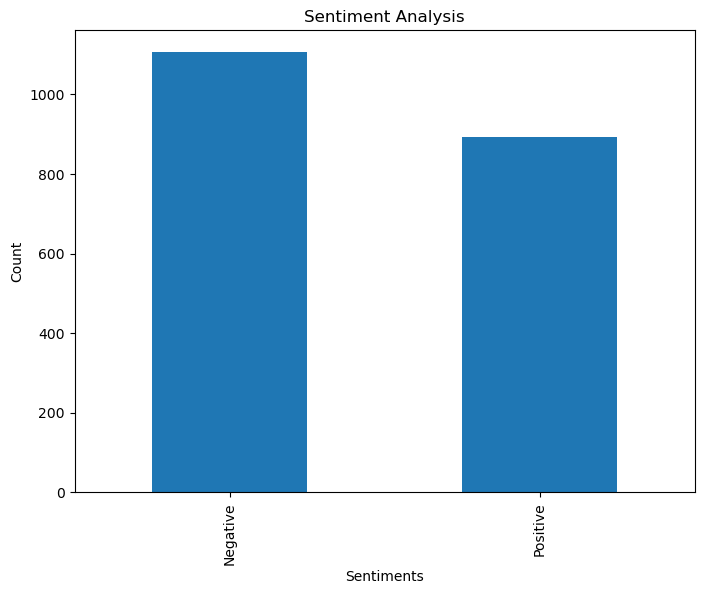

In [46]:
plt.figure(figsize=(8,6))
Final_tweets['Analysis'].value_counts().plot(kind='bar')
plt.title("Sentiment Analysis")
plt.xlabel('Sentiments')
plt.ylabel('Count')
plt.show()

- Compared to Positive tweets more negative tweets can be seen.